In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### Calculate maximum LaTeX formula length from an input file

In [13]:
def max_length(file_path, encoding="utf-8"):
    lens = []
    with open(file_path, "r", encoding=encoding) as file:
        for line in file:
            lens.append(len(line))
    return lens, max(lens)

In [20]:
def plot_len_dist(file_path, *args, encoding="utf-8", **kwargs):
    lens, max_len = max_length(file_path, encoding)
    plt.hist(lens, **kwargs)
    print("File: {}, max_len: {}".format(file_path, max_len))

File: data/formulas_processed.lst, max_len: 2178


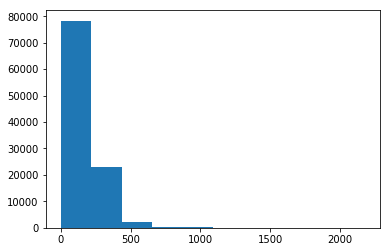

In [21]:
plot_len_dist("data/formulas_processed.lst")

File: data/formulas.lst, max_len: 998


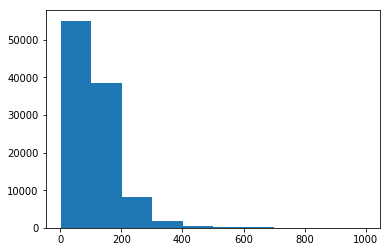

In [23]:
plot_len_dist("data/formulas.lst", encoding="ISO-8859-15")

### Encode-Decode

In [26]:
def to_utf(file_path, dest_path, encoding):
    with open(file_path, "r", encoding=encoding) as fin:
        with open(dest_path, "w", encoding="utf-8") as fout:
            for line in fin:
                fout.write(line)
    print("Done.")

In [27]:
to_utf("data/formulas.lst", "data/formulas_utf.lst", encoding="ISO-8859-15")

Done.
